#Detectron2

https://github.com/facebookresearch/detectron2

In [ ]:
# # install dependencies: 
# !pip install pyyaml==5.1
# import torch, torchvision
# print(torch.__version__, torch.cuda.is_available())
# !gcc --version
# # opencv is pre-installed on colab

In [ ]:
# # install detectron2: (Colab has CUDA 10.1 + torch 1.8)
# # See https://detectron2.readthedocs.io/tutorials/install.html for instructions
# import torch
# assert torch.__version__.startswith("1.8")   # need to manually install torch 1.8 if Colab changes its default version
# !pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.8/index.html
# # exit(0)  # After installation, you need to "restart runtime" in Colab. This line can also restart runtime

In [ ]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

# A metaadatok (képek, maszkok) inicializálása



https://github.com/ankurhanda/sunrgbd-meta-data.git

In [ ]:
%cd /content

In [ ]:
!wget http://www.doc.ic.ac.uk/~ahanda/SUNRGBD-train_images.tgz

In [ ]:
!wget http://www.doc.ic.ac.uk/~ahanda/SUNRGBD-test_images.tgz

In [ ]:
!mkdir images
!mkdir images/train
!mkdir images/test

In [ ]:
%cd images/train

In [ ]:
!tar -xvzf /content/SUNRGBD-train_images.tgz

In [ ]:
%cd ..

In [ ]:
%cd test

In [ ]:
!tar -xvzf /content/SUNRGBD-test_images.tgz

In [ ]:
%cd /content

In [ ]:
!wget https://github.com/ankurhanda/sunrgbd-meta-data/raw/master/sunrgbd_train_test_labels.tar.gz

In [ ]:
!mkdir labels
!mkdir labels/train
!mkdir labels/train2
!mkdir labels/test

In [ ]:
%cd labels/train2

In [ ]:
!tar -xvzf /content/sunrgbd_train_test_labels.tar.gz

In [ ]:
!mv /content/labels/train2/img-00[0-4]*.png /content/labels/test/

In [ ]:
!mv /content/labels/train2/img-0050[0-4]*.png /content/labels/test/

In [ ]:
!mv /content/labels/train2/img-005050.png /content/labels/test/

A train label-ek átnevezése, mindegyik nevéből levonok 5050 (test képek száma).

In [ ]:
import os

In [ ]:
for count, filename in enumerate(os.listdir("/content/labels/train2/")):
    if filename.find("png") != -1:
        dst = filename[:4]+f'{int(filename[4:10])-5050:06d}'+filename[10:]
        src ='/content/labels/train2/'+ filename
        dst ='/content/labels/train/'+ dst
        os.rename(src, dst)

## Ellenőrzés

In [ ]:
import cv2
import numpy as np
from  google.colab.patches import cv2_imshow

In [ ]:
img = cv2.imread("/content/images/train/img-000001.jpg")   
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)   # BGR -> RGB

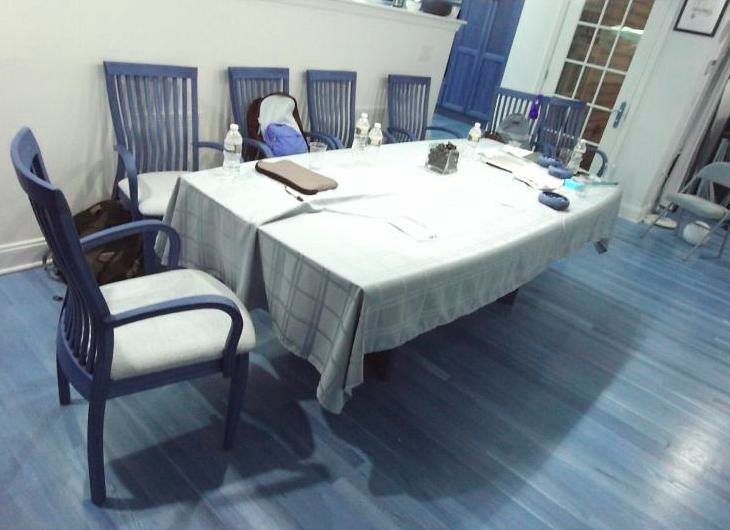

In [ ]:
cv2_imshow(img)

In [ ]:
img.shape

(530, 730, 3)

In [ ]:
row = img.flatten()

In [ ]:
row

array([215, 230, 227, ..., 158, 132, 105], dtype=uint8)

In [ ]:
channel_R = row[:530*730] 

In [ ]:
channel_R

array([215, 230, 227, ..., 252, 253, 255], dtype=uint8)

In [ ]:
channel_G = row[530*730:2*530*730] 

In [ ]:
channel_G

array([252, 253, 255, ...,  58,  57,  67], dtype=uint8)

In [ ]:
channel_B = row[2*530*730:3*530*730] 

In [ ]:
channel_B

array([ 53,  52,  62, ..., 158, 132, 105], dtype=uint8)

In [ ]:
matrix_channel_R = channel_R.reshape(530, 730)

In [ ]:
matrix_channel_R

array([[215, 230, 227, ..., 218, 214, 206],
       [218, 214, 205, ...,  93, 134, 105],
       [ 89, 132, 103, ...,  89,  88,  86],
       ...,
       [253, 255, 255, ..., 126, 119, 103],
       [184, 190, 186, ..., 243, 231, 238],
       [244, 232, 240, ..., 252, 253, 255]], dtype=uint8)

In [ ]:
label = cv2.imread("/content/labels/train/img-000001.png")   
label = cv2.cvtColor(label, cv2.COLOR_BGR2RGB)   # BGR -> RGB

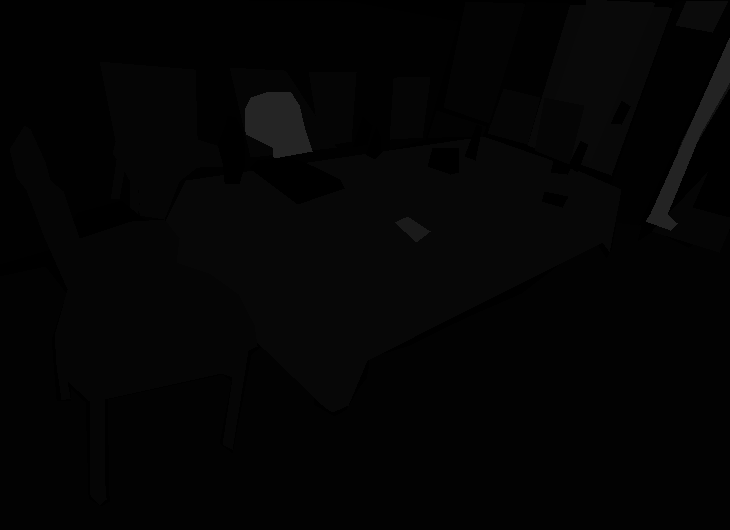

In [ ]:
cv2_imshow(label)

In [ ]:
label.shape

(530, 730, 3)

In [ ]:
label

array([[[ 1,  1,  1],
        [ 1,  1,  1],
        [ 1,  1,  1],
        ...,
        [ 1,  1,  1],
        [ 1,  1,  1],
        [ 1,  1,  1]],

       [[ 1,  1,  1],
        [ 1,  1,  1],
        [ 1,  1,  1],
        ...,
        [11, 11, 11],
        [ 1,  1,  1],
        [ 1,  1,  1]],

       [[ 1,  1,  1],
        [ 1,  1,  1],
        [ 1,  1,  1],
        ...,
        [11, 11, 11],
        [ 1,  1,  1],
        [ 1,  1,  1]],

       ...,

       [[ 2,  2,  2],
        [ 2,  2,  2],
        [ 2,  2,  2],
        ...,
        [ 2,  2,  2],
        [ 2,  2,  2],
        [ 2,  2,  2]],

       [[ 2,  2,  2],
        [ 2,  2,  2],
        [ 2,  2,  2],
        ...,
        [ 2,  2,  2],
        [ 2,  2,  2],
        [ 2,  2,  2]],

       [[ 2,  2,  2],
        [ 2,  2,  2],
        [ 2,  2,  2],
        ...,
        [ 2,  2,  2],
        [ 2,  2,  2],
        [ 2,  2,  2]]], dtype=uint8)

In [ ]:
# wall
label[0][0]

array([1, 1, 1], dtype=uint8)

In [ ]:
# floor
label[529][0]

array([2, 2, 2], dtype=uint8)

# A JSON fájl előállítása

https://github.com/chrise96/image-to-coco-json-converter.git

In [ ]:
%cd /content

In [ ]:
!git clone https://github.com/chrise96/image-to-coco-json-converter.git

In [ ]:
%cd /content/image-to-coco-json-converter

In [ ]:
import glob
from src.create_annotations import *

In [ ]:
# Label ids of the dataset
category_ids = {
    # "outlier": 0,
    "wall": 1,
    "floor": 2,
    "cabinet": 3,
    "bed": 4,
    "chair": 5,
    "sofa": 6,
    "table": 7,
    "door": 8,
    "window": 9,
    "bookshelf": 10,
    "picture": 11,
    "counter": 12,
    "blinds": 13,
    "desk": 14,
    "shelves": 15,
    "curtain": 16,
    "dresser": 17,
    "pillow": 18,
    "mirror": 19,
    "floor_mat": 20,
    "clothes": 21,
    "ceiling": 22,
    "books": 23,
    "fridge": 24,
    "tv": 25,
    "paper": 26,
    "towel": 27,
    "shower_curtain": 28,
    "box": 29,
    "whiteboard": 30,
    "person": 31,
    "night_stand": 32,
    "toilet": 33,
    "sink": 34,
    "lamp": 35,
    "bathtub": 36,
    "bag": 37
}

In [ ]:
# Define which colors match which categories in the images
category_colors = {
    # "(0, 0, 0)": 0,
    "(1, 1, 1)": 1,
    "(2, 2, 2)": 2,
    "(3, 3, 3)": 3,
    "(4, 4, 4)": 4,
    "(5, 5, 5)": 5,
    "(6, 6, 6)": 6,
    "(7, 7, 7)": 7,
    "(8, 8, 8)": 8,
    "(9, 9, 9)": 9,
    "(10, 10, 10)": 10,
    "(11, 11, 11)": 11,
    "(12, 12, 12)": 12,
    "(13, 13, 13)": 13,
    "(14, 14, 14)": 14,
    "(15, 15, 15)": 15,
    "(16, 16, 16)": 16,
    "(17, 17, 17)": 17,
    "(18, 18, 18)": 18,
    "(19, 19, 19)": 19,
    "(20, 20, 20)": 20,
    "(21, 21, 21)": 21,
    "(22, 22, 22)": 22,
    "(23, 23, 23)": 23,
    "(24, 24, 24)": 24,
    "(25, 25, 25)": 25,
    "(26, 26, 26)": 26,
    "(27, 27, 27)": 27,
    "(28, 28, 28)": 28,
    "(29, 29, 29)": 29,
    "(30, 30, 30)": 30,
    "(31, 31, 31)": 31,
    "(32, 32, 32)": 32,
    "(33, 33, 33)": 33,
    "(34, 34, 34)": 34,
    "(35, 35, 35)": 35,
    "(36, 36, 36)": 36,
    "(37, 37, 37)": 37
}

In [ ]:
# Define the ids that are a multiplolygon.
multipolygon_ids = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 
                    11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 
                    21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 
                    31, 32, 33, 34, 35, 36, 37]

In [ ]:
# Get "images" and "annotations" info 
def images_annotations_info(maskpath):
    # This id will be automatically increased as we go
    annotation_id = 0
    image_id = 0
    annotations = []
    images = []
    
    for mask_image in glob.glob(maskpath + "*.png"):
        # The mask image is *.png but the original image is *.jpg.
        # We make a reference to the original file in the COCO JSON file
        original_file_name = os.path.basename(mask_image).split(".")[0] + ".jpg"

        # Open the image and (to be sure) we convert it to RGB
        mask_image_open = Image.open(mask_image).convert("RGB")
        w, h = mask_image_open.size
        
        # "images" info 
        image = create_image_annotation(original_file_name, w, h, image_id)
        images.append(image)

        # print(mask_image)
        sub_masks = create_sub_masks(mask_image_open, w, h)
        for color, sub_mask in sub_masks.items():
            # We do not need outlier 
            if color != '(0, 0, 0)':
                category_id = category_colors[color]

                # "annotations" info            
                polygons, segmentations = create_sub_mask_annotation(sub_mask)

                # Check if we have classes that are a multipolygon
                if category_id in multipolygon_ids:
                    # Combine the polygons to calculate the bounding box and area
                    multi_poly = MultiPolygon(polygons)
                                    
                    annotation = create_annotation_format(multi_poly, segmentations, image_id, category_id, annotation_id)

                    annotations.append(annotation)
                    annotation_id += 1
                else:
                    for i in range(len(polygons)):
                        # Cleaner to recalculate this variable
                        segmentation = [np.array(polygons[i].exterior.coords).ravel().tolist()]
                        
                        annotation = create_annotation_format(polygons[i], segmentation, image_id, category_id, annotation_id)
                        
                        annotations.append(annotation)
                        annotation_id += 1
        image_id += 1
        # os.remove("/content/image-to-coco-json-converter/" + mask_image)
    return images, annotations, annotation_id

In [ ]:
import shutil
shutil.rmtree("/content/image-to-coco-json-converter/dataset")

In [ ]:
!mkdir dataset
!mkdir dataset/train
!mkdir dataset/train_mask
!mkdir dataset/test
!mkdir dataset/test_mask

In [ ]:
src_files = os.listdir("/content/images/test/")
for file_name in src_files:
    full_file_name = os.path.join("/content/images/test/", file_name)
    if os.path.isfile(full_file_name):
        shutil.copy(full_file_name, "/content/image-to-coco-json-converter/dataset/test/")

In [ ]:
src_files = os.listdir("/content/images/train/")
for file_name in src_files:
    full_file_name = os.path.join("/content/images/train/", file_name)
    if os.path.isfile(full_file_name):
        shutil.copy(full_file_name, "/content/image-to-coco-json-converter/dataset/train/")

In [ ]:
src_files = os.listdir("/content/labels/test/")
for file_name in src_files:
    full_file_name = os.path.join("/content/labels/test/", file_name)
    if os.path.isfile(full_file_name):
        shutil.copy(full_file_name, "/content/image-to-coco-json-converter/dataset/test_mask/")

In [ ]:
src_files = os.listdir("/content/labels/train/")
for file_name in src_files:
    full_file_name = os.path.join("/content/labels/train/", file_name)
    if os.path.isfile(full_file_name):
        shutil.copy(full_file_name, "/content/image-to-coco-json-converter/dataset/train_mask/")

A nem megfelelő képek törlése.

In [ ]:
os.remove("/content/image-to-coco-json-converter/dataset/train/img-002892.jpg")
os.remove("/content/image-to-coco-json-converter/dataset/train_mask/img-002892.png")

In [ ]:
os.remove("/content/image-to-coco-json-converter/dataset/train/img-002790.jpg")
os.remove("/content/image-to-coco-json-converter/dataset/train_mask/img-002790.png")

In [ ]:
os.remove("/content/image-to-coco-json-converter/dataset/train/img-002277.jpg")
os.remove("/content/image-to-coco-json-converter/dataset/train_mask/img-002277.png")

In [ ]:
os.remove("/content/image-to-coco-json-converter/dataset/train/img-003042.jpg")
os.remove("/content/image-to-coco-json-converter/dataset/train_mask/img-003042.png")

In [ ]:
os.remove("/content/image-to-coco-json-converter/dataset/train/img-002663.jpg")
os.remove("/content/image-to-coco-json-converter/dataset/train_mask/img-002663.png")

In [ ]:
os.remove("/content/image-to-coco-json-converter/dataset/train/img-002256.jpg")
os.remove("/content/image-to-coco-json-converter/dataset/train_mask/img-002256.png")

In [ ]:
os.remove("/content/image-to-coco-json-converter/dataset/train/img-004801.jpg")
os.remove("/content/image-to-coco-json-converter/dataset/train_mask/img-004801.png")

In [ ]:
os.remove("/content/image-to-coco-json-converter/dataset/train/img-004424.jpg")
os.remove("/content/image-to-coco-json-converter/dataset/train_mask/img-004424.png")

In [ ]:
os.remove("/content/image-to-coco-json-converter/dataset/train/img-003436.jpg")
os.remove("/content/image-to-coco-json-converter/dataset/train_mask/img-003436.png")

In [ ]:
os.remove("/content/image-to-coco-json-converter/dataset/train/img-002779.jpg")
os.remove("/content/image-to-coco-json-converter/dataset/train_mask/img-002779.png")

In [ ]:
os.remove("/content/image-to-coco-json-converter/dataset/train/img-002356.jpg")
os.remove("/content/image-to-coco-json-converter/dataset/train_mask/img-002356.png")

In [ ]:
os.remove("/content/image-to-coco-json-converter/dataset/train/img-003746.jpg")
os.remove("/content/image-to-coco-json-converter/dataset/train_mask/img-003746.png")

In [ ]:
os.remove("/content/image-to-coco-json-converter/dataset/train/img-002088.jpg")
os.remove("/content/image-to-coco-json-converter/dataset/train_mask/img-002088.png")

In [ ]:
os.remove("/content/image-to-coco-json-converter/dataset/train/img-002868.jpg")
os.remove("/content/image-to-coco-json-converter/dataset/train_mask/img-002868.png")

In [ ]:
os.remove("/content/image-to-coco-json-converter/dataset/train/img-000265.jpg")
os.remove("/content/image-to-coco-json-converter/dataset/train_mask/img-000265.png")

In [ ]:
os.remove("/content/image-to-coco-json-converter/dataset/train/img-000332.jpg")
os.remove("/content/image-to-coco-json-converter/dataset/train_mask/img-000332.png")

In [ ]:
os.remove("/content/image-to-coco-json-converter/dataset/train/img-000976.jpg")
os.remove("/content/image-to-coco-json-converter/dataset/train_mask/img-000976.png")

In [ ]:
os.remove("/content/image-to-coco-json-converter/dataset/train/img-003667.jpg")
os.remove("/content/image-to-coco-json-converter/dataset/train_mask/img-003667.png")

In [ ]:
os.remove("/content/image-to-coco-json-converter/dataset/train/img-000495.jpg")
os.remove("/content/image-to-coco-json-converter/dataset/train_mask/img-000495.png")

In [ ]:
os.remove("/content/image-to-coco-json-converter/dataset/train/img-003211.jpg")
os.remove("/content/image-to-coco-json-converter/dataset/train_mask/img-003211.png")

In [ ]:
os.remove("/content/image-to-coco-json-converter/dataset/train/img-002891.jpg")
os.remove("/content/image-to-coco-json-converter/dataset/train_mask/img-002891.png")

In [ ]:
os.remove("/content/image-to-coco-json-converter/dataset/train/img-000490.jpg")
os.remove("/content/image-to-coco-json-converter/dataset/train_mask/img-000490.png")

In [ ]:
os.remove("/content/image-to-coco-json-converter/dataset/train/img-002244.jpg")
os.remove("/content/image-to-coco-json-converter/dataset/train_mask/img-002244.png")

In [ ]:
os.remove("/content/image-to-coco-json-converter/dataset/train/img-003007.jpg")
os.remove("/content/image-to-coco-json-converter/dataset/train_mask/img-003007.png")

In [ ]:
os.remove("/content/image-to-coco-json-converter/dataset/train/img-000511.jpg")
os.remove("/content/image-to-coco-json-converter/dataset/train_mask/img-000511.png")

In [ ]:
os.remove("/content/image-to-coco-json-converter/dataset/train/img-002685.jpg")
os.remove("/content/image-to-coco-json-converter/dataset/train_mask/img-002685.png")

In [ ]:
os.remove("/content/image-to-coco-json-converter/dataset/train/img-000235.jpg")
os.remove("/content/image-to-coco-json-converter/dataset/train_mask/img-000235.png")

In [ ]:
os.remove("/content/image-to-coco-json-converter/dataset/train/img-004878.jpg")
os.remove("/content/image-to-coco-json-converter/dataset/train_mask/img-004878.png")

In [ ]:
os.remove("/content/image-to-coco-json-converter/dataset/train/img-002935.jpg")
os.remove("/content/image-to-coco-json-converter/dataset/train_mask/img-002935.png")

In [ ]:
os.remove("/content/image-to-coco-json-converter/dataset/train/img-001284.jpg")
os.remove("/content/image-to-coco-json-converter/dataset/train_mask/img-001284.png")

In [ ]:
os.remove("/content/image-to-coco-json-converter/dataset/train/img-003701.jpg")
os.remove("/content/image-to-coco-json-converter/dataset/train_mask/img-003701.png")

In [ ]:
os.remove("/content/image-to-coco-json-converter/dataset/train/img-004739.jpg")
os.remove("/content/image-to-coco-json-converter/dataset/train_mask/img-004739.png")

In [ ]:
os.remove("/content/image-to-coco-json-converter/dataset/train/img-001422.jpg")
os.remove("/content/image-to-coco-json-converter/dataset/train_mask/img-001422.png")

In [ ]:
os.remove("/content/image-to-coco-json-converter/dataset/train/img-002504.jpg")
os.remove("/content/image-to-coco-json-converter/dataset/train_mask/img-002504.png")

In [ ]:
os.remove("/content/image-to-coco-json-converter/dataset/train/img-002067.jpg")
os.remove("/content/image-to-coco-json-converter/dataset/train_mask/img-002067.png")

In [ ]:
os.remove("/content/image-to-coco-json-converter/dataset/train/img-003226.jpg")
os.remove("/content/image-to-coco-json-converter/dataset/train_mask/img-003226.png")

In [ ]:
os.remove("/content/image-to-coco-json-converter/dataset/train/img-002537.jpg")
os.remove("/content/image-to-coco-json-converter/dataset/train_mask/img-002537.png")

In [ ]:
os.remove("/content/image-to-coco-json-converter/dataset/train/img-002909.jpg")
os.remove("/content/image-to-coco-json-converter/dataset/train_mask/img-002909.png")

In [ ]:
os.remove("/content/image-to-coco-json-converter/dataset/test/img-002389.jpg")
os.remove("/content/image-to-coco-json-converter/dataset/test_mask/img-002389.png")

In [ ]:
os.remove("/content/image-to-coco-json-converter/dataset/test/img-003446.jpg")
os.remove("/content/image-to-coco-json-converter/dataset/test_mask/img-003446.png")

In [ ]:
os.remove("/content/image-to-coco-json-converter/dataset/test/img-000341.jpg")
os.remove("/content/image-to-coco-json-converter/dataset/test_mask/img-000341.png")

In [ ]:
os.remove("/content/image-to-coco-json-converter/dataset/test/img-001958.jpg")
os.remove("/content/image-to-coco-json-converter/dataset/test_mask/img-001958.png")

In [ ]:
os.remove("/content/image-to-coco-json-converter/dataset/test/img-001588.jpg")
os.remove("/content/image-to-coco-json-converter/dataset/test_mask/img-001588.png")

In [ ]:
os.remove("/content/image-to-coco-json-converter/dataset/test/img-002569.jpg")
os.remove("/content/image-to-coco-json-converter/dataset/test_mask/img-002569.png")

In [ ]:
os.remove("/content/image-to-coco-json-converter/dataset/test/img-002415.jpg")
os.remove("/content/image-to-coco-json-converter/dataset/test_mask/img-002415.png")

In [ ]:
os.remove("/content/image-to-coco-json-converter/dataset/test/img-000283.jpg")
os.remove("/content/image-to-coco-json-converter/dataset/test_mask/img-000283.png")

In [ ]:
os.remove("/content/image-to-coco-json-converter/dataset/test/img-004417.jpg")
os.remove("/content/image-to-coco-json-converter/dataset/test_mask/img-004417.png")

In [ ]:
os.remove("/content/image-to-coco-json-converter/dataset/test/img-002120.jpg")
os.remove("/content/image-to-coco-json-converter/dataset/test_mask/img-002120.png")

In [ ]:
os.remove("/content/image-to-coco-json-converter/dataset/test/img-001195.jpg")
os.remove("/content/image-to-coco-json-converter/dataset/test_mask/img-001195.png")

In [ ]:
os.remove("/content/image-to-coco-json-converter/dataset/test/img-000356.jpg")
os.remove("/content/image-to-coco-json-converter/dataset/test_mask/img-000356.png")

In [ ]:
os.remove("/content/image-to-coco-json-converter/dataset/test/img-002701.jpg")
os.remove("/content/image-to-coco-json-converter/dataset/test_mask/img-002701.png")

In [ ]:
os.remove("/content/image-to-coco-json-converter/dataset/test/img-000771.jpg")
os.remove("/content/image-to-coco-json-converter/dataset/test_mask/img-000771.png")

In [ ]:
os.remove("/content/image-to-coco-json-converter/dataset/test/img-000914.jpg")
os.remove("/content/image-to-coco-json-converter/dataset/test_mask/img-000914.png")

In [ ]:
os.remove("/content/image-to-coco-json-converter/dataset/test/img-003769.jpg")
os.remove("/content/image-to-coco-json-converter/dataset/test_mask/img-003769.png")

In [ ]:
os.remove("/content/image-to-coco-json-converter/dataset/test/img-004332.jpg")
os.remove("/content/image-to-coco-json-converter/dataset/test_mask/img-004332.png")

In [ ]:
os.remove("/content/image-to-coco-json-converter/dataset/test/img-001234.jpg")
os.remove("/content/image-to-coco-json-converter/dataset/test_mask/img-001234.png")

In [ ]:
os.remove("/content/image-to-coco-json-converter/dataset/test/img-000023.jpg")
os.remove("/content/image-to-coco-json-converter/dataset/test_mask/img-000023.png")

In [ ]:
os.remove("/content/image-to-coco-json-converter/dataset/test/img-000936.jpg")
os.remove("/content/image-to-coco-json-converter/dataset/test_mask/img-000936.png")

In [ ]:
os.remove("/content/image-to-coco-json-converter/dataset/test/img-002281.jpg")
os.remove("/content/image-to-coco-json-converter/dataset/test_mask/img-002281.png")

In [ ]:
os.remove("/content/image-to-coco-json-converter/dataset/test/img-003422.jpg")
os.remove("/content/image-to-coco-json-converter/dataset/test_mask/img-003422.png")

In [ ]:
os.remove("/content/image-to-coco-json-converter/dataset/test/img-002180.jpg")
os.remove("/content/image-to-coco-json-converter/dataset/test_mask/img-002180.png")

In [ ]:
os.remove("/content/image-to-coco-json-converter/dataset/test/img-002200.jpg")
os.remove("/content/image-to-coco-json-converter/dataset/test_mask/img-002200.png")

In [ ]:
os.remove("/content/image-to-coco-json-converter/dataset/test/img-003449.jpg")
os.remove("/content/image-to-coco-json-converter/dataset/test_mask/img-003449.png")

In [ ]:
os.remove("/content/image-to-coco-json-converter/dataset/test/img-000807.jpg")
os.remove("/content/image-to-coco-json-converter/dataset/test_mask/img-000807.png")

In [ ]:
os.remove("/content/image-to-coco-json-converter/dataset/test/img-000287.jpg")
os.remove("/content/image-to-coco-json-converter/dataset/test_mask/img-000287.png")

In [ ]:
os.remove("/content/image-to-coco-json-converter/dataset/test/img-002336.jpg")
os.remove("/content/image-to-coco-json-converter/dataset/test_mask/img-002336.png")

In [ ]:
os.remove("/content/image-to-coco-json-converter/dataset/test/img-001492.jpg")
os.remove("/content/image-to-coco-json-converter/dataset/test_mask/img-001492.png")

In [ ]:
os.remove("/content/image-to-coco-json-converter/dataset/test/img-002297.jpg")
os.remove("/content/image-to-coco-json-converter/dataset/test_mask/img-002297.png")

In [ ]:
if __name__ == "__main__":
    # Get the standard COCO JSON format
    coco_format = get_coco_json_format()
    
    for keyword in ["train", "test"]:
        mask_path = "dataset/{}_mask/".format(keyword)
        
        # Create category section
        coco_format["categories"] = create_category_annotation(category_ids)
    
        # Create images and annotations sections
        coco_format["images"], coco_format["annotations"], annotation_cnt = images_annotations_info(mask_path)

        with open("output/{}.json".format(keyword),"w") as outfile:
            json.dump(coco_format, outfile)
        
        print("Created %d annotations for images in folder: %s" % (annotation_cnt, mask_path))

Created 30037 annotations for images in folder: dataset/train_mask/
Created 29473 annotations for images in folder: dataset/test_mask/


In [ ]:
zip_name = 'test'
directory_name = '/content/image-to-coco-json-converter/dataset/test'

# Create 'path\to\zip_file.zip'
shutil.make_archive(zip_name, 'zip', directory_name)

In [ ]:
zip_name = 'test_mask'
directory_name = '/content/image-to-coco-json-converter/dataset/test_mask'

# Create 'path\to\zip_file.zip'
shutil.make_archive(zip_name, 'zip', directory_name)

In [ ]:
zip_name = 'train'
directory_name = '/content/image-to-coco-json-converter/dataset/train'

# Create 'path\to\zip_file.zip'
shutil.make_archive(zip_name, 'zip', directory_name)

In [ ]:
zip_name = 'train_mask'
directory_name = '/content/image-to-coco-json-converter/dataset/train_mask'

# Create 'path\to\zip_file.zip'
shutil.make_archive(zip_name, 'zip', directory_name)

# Vizualizáció

https://github.com/waspinator/pycococreator.git

In [ ]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab

In [ ]:
image_directory = '/content/image-to-coco-json-converter/dataset/train/'
annotation_file = '/content/image-to-coco-json-converter/output/train.json'

In [ ]:
example_coco = COCO(annotation_file)

In [ ]:
categories = example_coco.loadCats(example_coco.getCatIds())
category_names = [category['name'] for category in categories]
print('Custom COCO categories: \n{}\n'.format(' '.join(category_names)))

category_names = set([category['supercategory'] for category in categories])
print('Custom COCO supercategories: \n{}'.format(' '.join(category_names)))

Custom COCO categories: 
wall floor cabinet bed chair sofa table door window bookshelf picture counter blinds desk shelves curtain dresser pillow mirror floor_mat clothes ceiling books fridge tv paper towel shower_curtain box whiteboard person night_stand toilet sink lamp bathtub bag

Custom COCO supercategories: 
desk lamp floor curtain blinds whiteboard table paper ceiling mirror fridge pillow clothes books shelves tv bookshelf sink box shower_curtain picture wall towel cabinet bag night_stand toilet door bathtub counter window chair person dresser bed sofa floor_mat


In [ ]:
category_ids = example_coco.getCatIds(catNms=['square'])
image_ids = example_coco.getImgIds(catIds=category_ids)
image_data = example_coco.loadImgs(image_ids[np.random.randint(0, len(image_ids))])[0]

In [ ]:
image_data

{'file_name': 'img-000783.jpg', 'height': 530, 'id': 5125, 'width': 730}

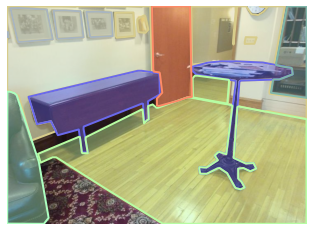

In [ ]:
# load and display instance annotations
image = io.imread(image_directory + image_data['file_name'])
plt.imshow(image); plt.axis('off')
pylab.rcParams['figure.figsize'] = (8.0, 10.0)
annotation_ids = example_coco.getAnnIds(imgIds=image_data['id'], catIds=category_ids, iscrowd=None)
annotations = example_coco.loadAnns(annotation_ids)
example_coco.showAnns(annotations)

In [ ]:
image_data = example_coco.loadImgs(image_ids[np.random.randint(0, len(image_ids))])[0]

In [ ]:
image_data

{'file_name': 'img-004813.jpg', 'height': 531, 'id': 683, 'width': 681}

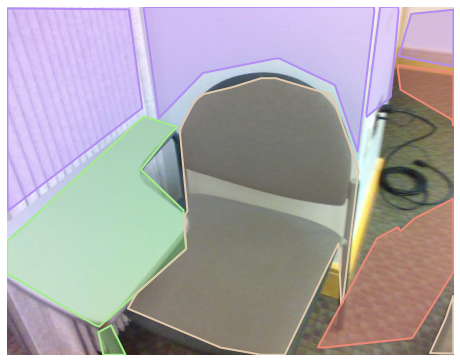

In [ ]:
# load and display instance annotations
image = io.imread(image_directory + image_data['file_name'])
plt.imshow(image); plt.axis('off')
pylab.rcParams['figure.figsize'] = (8.0, 10.0)
annotation_ids = example_coco.getAnnIds(imgIds=image_data['id'], catIds=category_ids, iscrowd=None)
annotations = example_coco.loadAnns(annotation_ids)
example_coco.showAnns(annotations)

In [ ]:
shutil.copytree("/content/image-to-coco-json-converter/dataset/", "/content/drive/MyDrive/SUNRGBD/dataset")  

In [ ]:
shutil.copy("/content/image-to-coco-json-converter/output/test.json", "/content/drive/MyDrive/SUNRGBD/test.json")

In [ ]:
shutil.copy("/content/image-to-coco-json-converter/output/train.json", "/content/drive/MyDrive/SUNRGBD/train.json")

In [ ]:
shutil.copy("/content/image-to-coco-json-converter/test.zip", "/content/drive/MyDrive/SUNRGBD/test.zip")

In [ ]:
shutil.copy("/content/image-to-coco-json-converter/test_mask.zip", "/content/drive/MyDrive/SUNRGBD/test_mask.zip")

In [ ]:
shutil.copy("/content/image-to-coco-json-converter/train.zip", "/content/drive/MyDrive/SUNRGBD/train.zip")

In [ ]:
shutil.copy("/content/image-to-coco-json-converter/train_mask.zip", "/content/drive/MyDrive/SUNRGBD/train_mask.zip")

In [ ]:
from detectron2.data.datasets import register_coco_instances
register_coco_instances("my_dataset_train", {}, "/content/drive/MyDrive/SUNRGBD/train.json", "/content/drive/MyDrive/SUNRGBD/dataset/train/")
register_coco_instances("my_dataset_val", {}, "/content/drive/MyDrive/SUNRGBD/test.json", "/content/drive/MyDrive/SUNRGBD/dataset/test")

In [ ]:
from detectron2.data.datasets import load_coco_json
dataset_dicts_train = load_coco_json("/content/drive/MyDrive/SUNRGBD/train.json", "/content/drive/MyDrive/SUNRGBD/dataset/train/", "my_dataset_train")
dataset_dicts_test = load_coco_json("/content/drive/MyDrive/SUNRGBD/train.json", "/content/drive/MyDrive/SUNRGBD/dataset/train/", "my_dataset_val")

[05/02 15:24:48 d2.data.datasets.coco]: Loading /content/drive/MyDrive/SUNRGBD/train.json takes 1.02 seconds.
[05/02 15:24:48 d2.data.datasets.coco]: Loaded 5247 images in COCO format from /content/drive/MyDrive/SUNRGBD/train.json
[05/02 15:24:50 d2.data.datasets.coco]: Loaded 5247 images in COCO format from /content/drive/MyDrive/SUNRGBD/train.json


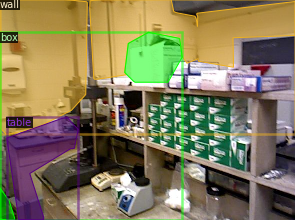

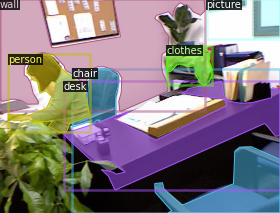

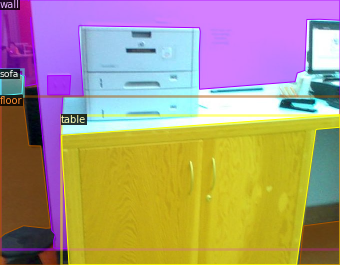

In [ ]:
for d in random.sample(dataset_dicts_train, 3):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=MetadataCatalog.get("my_dataset_train"), scale=0.5)
    out = visualizer.draw_dataset_dict(d)
    cv2_imshow(out.get_image()[:, :, ::-1])

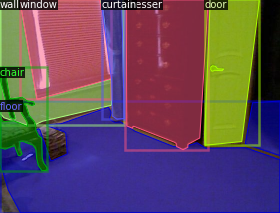

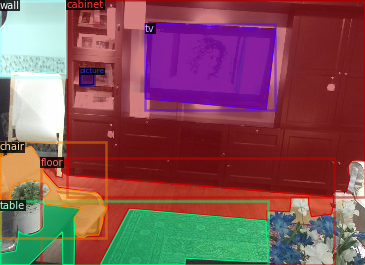

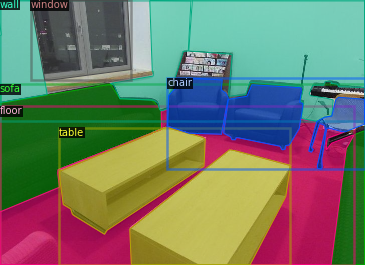

In [ ]:
for d in random.sample(dataset_dicts_test, 3):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=MetadataCatalog.get("my_dataset_val"), scale=0.5)
    out = visualizer.draw_dataset_dict(d)
    cv2_imshow(out.get_image()[:, :, ::-1])